In [13]:
!pip install curses

ERROR: Could not find a version that satisfies the requirement curses (from versions: none)
ERROR: No matching distribution found for curses


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta 
import matplotlib.pylab as plt


In [4]:
df = yf.download('SQ', start='2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,56.439999,57.349998,55.459999,56.090000,56.090000,13258800
2019-01-02,54.099998,57.830002,53.560001,57.200001,57.200001,13434000
2019-01-03,55.580002,56.730000,52.259998,52.419998,52.419998,19076300
2019-01-04,54.400002,59.660000,53.861000,58.180000,58.180000,30228600
2019-01-07,59.000000,61.290001,58.049999,60.720001,60.720001,18146900
...,...,...,...,...,...,...
2022-09-09,71.620003,74.730003,71.620003,74.290001,74.290001,12325300
2022-09-12,75.209999,76.713997,73.910004,75.250000,75.250000,10257400
2022-09-13,70.070000,71.375000,69.250000,69.580002,69.580002,12943200


In [8]:
df.std()

Open         7.338733e+01
High         7.463484e+01
Low          7.184529e+01
Close        7.315753e+01
Adj Close    7.315753e+01
Volume       6.916303e+06
ma_20        7.264103e+01
dtype: float64

In [10]:
# Technical Indicator Calculation
df['ma_20'] = df.Close.rolling (20).mean()
df['vol'] = df.Close.rolling(20).std()
df['upper_bb'] = df.ma_20 + (2 * df.vol)
df['lower_bb'] = df.ma_20 - (2 * df.vol)
df

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb
Date,,,,,,,,,,
2018-12-31,56.439999,57.349998,55.459999,56.090000,56.090000,13258800,NaN,NaN,NaN,NaN
2019-01-02,54.099998,57.830002,53.560001,57.200001,57.200001,13434000,NaN,NaN,NaN,NaN
2019-01-03,55.580002,56.730000,52.259998,52.419998,52.419998,19076300,NaN,NaN,NaN,NaN
2019-01-04,54.400002,59.660000,53.861000,58.180000,58.180000,30228600,NaN,NaN,NaN,NaN
2019-01-07,59.000000,61.290001,58.049999,60.720001,60.720001,18146900,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-09-09,71.620003,74.730003,71.620003,74.290001,74.290001,12325300,73.691001,6.916659,87.524319,59.857682
2022-09-12,75.209999,76.713997,73.910004,75.250000,75.250000,10257400,73.056001,6.069815,85.195630,60.916372
2022-09-13,70.070000,71.375000,69.250000,69.580002,69.580002,12943200,72.199001,5.184486,82.567973,61.830029


<AxesSubplot:xlabel='Date'>

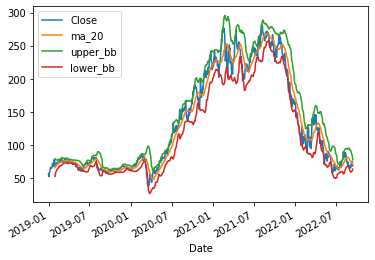

In [11]:
df[['Close', 'ma_20', 'upper_bb', 'lower_bb']].plot()

In [14]:
df['rsi'] = ta.momentum.rsi(df.Close, window=6)

In [20]:


Condition = [(df.rsi < 30) & (df.Close < df.lower_bb),(df.rsi > 70) & (df.Close > df.upper_bb)]

In [21]:
choices  = ['Buy', 'Sell']

In [24]:
df['signal'] = np.select(Condition, choices)

In [26]:
df.dropna(inplace=True)

In [31]:
df.tail(70)

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb,rsi,signal
Date,,,,,,,,,,,,
2022-06-07,81.879997,85.199997,80.250000,84.599998,84.599998,14313300,82.587500,4.590494,91.768487,73.406513,50.557164,0
2022-06-08,84.599998,87.550003,83.870003,84.750000,84.750000,12757300,82.605500,4.598632,91.802764,73.408236,50.966259,0
2022-06-09,84.629997,84.959999,76.489998,76.580002,76.580002,19594300,82.873500,4.019960,90.913420,74.833580,33.078026,0
2022-06-10,75.860001,76.239998,70.230003,71.870003,71.870003,21288000,82.679000,4.453030,91.585059,73.772941,26.615534,Buy
2022-06-13,66.160004,68.779999,62.500000,62.759998,62.759998,26455800,81.609500,6.276465,94.162429,69.056571,18.311839,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-09,71.620003,74.730003,71.620003,74.290001,74.290001,12325300,73.691001,6.916659,87.524319,59.857682,65.920164,0
2022-09-12,75.209999,76.713997,73.910004,75.250000,75.250000,10257400,73.056001,6.069815,85.195630,60.916372,68.552619,0
2022-09-13,70.070000,71.375000,69.250000,69.580002,69.580002,12943200,72.199001,5.184486,82.567973,61.830029,44.299933,0


In [32]:
df.signal = df.signal.shift()

In [60]:
from turtle import position


poistion  = False
buydates, selldates = [], []
buyprices, sellprices = [], []

for index,row in  df.iterrows():
    if not position and row['signal'] == 'Buy':
        buydates.append(index)
        buyprices.append(row.Open)
        position = True

    if position and row['signal'] == 'Sell':
        selldates.append(index)
        sellprices.append(row.Open)
        position = False

ConversionError: Failed to convert value(s) to axis units:                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-03-01   80.970001   81.029999   76.690002   77.459999   77.459999   
2019-06-10   69.570000   71.699997   69.120003   70.370003   70.370003   
2019-11-20   66.360001   67.750000   66.019997   67.169998   67.169998   
2020-01-09   68.220001   68.309998   66.699997   67.930000   67.930000   
2020-05-07   69.860001   76.800003   69.580002   74.620003   74.620003   
2020-11-24  208.000000  208.039993  199.550003  202.899994  202.899994   
2021-02-09  256.579987  262.570007  250.550003  258.119995  258.119995   
2021-04-14  274.130005  278.130005  256.575012  258.399994  258.399994   
2021-06-18  235.029999  239.960007  233.000000  237.050003  237.050003   
2022-03-21  138.360001  139.729996  129.639999  134.820007  134.820007   
2022-07-21   73.309998   75.169998   72.169998   74.760002   74.760002   

              Volume       ma_20        vol    upper_bb    lower_bb  \
Date                                                                  
2019-03-01  22485900   75.300499   2.664435   80.629369   69.971629   
2019-06-10  10668200   64.841500   2.204045   69.249590   60.433410   
2019-11-20   9595800   63.073000   1.755832   66.584665   59.561335   
2020-01-09   8739100   64.514000   1.664545   67.843090   61.184911   
2020-05-07  31027000   62.819500   3.949109   70.717717   54.921282   
2020-11-24  12288900  179.800999  15.036692  209.874382  149.727616   
2021-02-09  10815100  227.661501  13.933115  255.527730  199.795271   
2021-04-14  12486400  234.275500  20.322143  274.919786  193.631214   
2021-06-18   8518300  219.757499   8.973432  237.704364  201.810634   
2022-03-21  30703500  111.713000  15.004493  141.721986   81.704015   
2022-07-21  14683000   66.786000   3.661569   74.109138   59.462861   

                  rsi signal  shifted_Close  
Date                                         
2019-03-01  51.685456   Sell      81.239998  
2019-06-10  76.117343   Sell      68.459999  
2019-11-20  75.397387   Sell      66.370003  
2020-01-09  75.201356   Sell      67.599998  
2020-05-07  83.187053   Sell      68.099998  
2020-11-24  68.480035   Sell     207.779999  
2021-02-09  80.843223   Sell     259.970001  
2021-04-14  60.992706   Sell     273.230011  
2021-06-18  73.555217   Sell     236.130005  
2022-03-21  68.352804   Sell     140.639999  
2022-07-21  76.235011   Sell      74.779999  

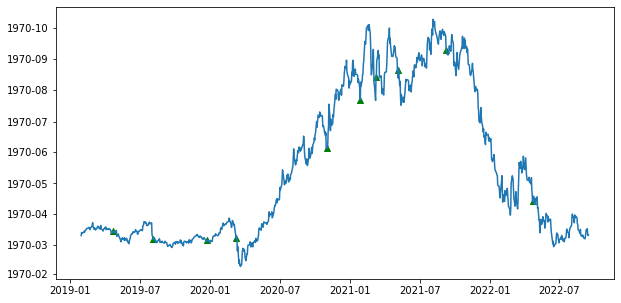

In [61]:
#visualisation
plt.figure(figsize=(10,5))
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index, df.loc[buydates].Close, marker='^', c='g')
plt.scatter(df.loc[selldates],index, df.loc[selldates].Close, marker='v', c='r')

In [53]:
(pd.Series([(sell - buy) / buy for sell,buy in zip(sellprices,buyprices)]) + 1).prod() - 1

-0.05104298039449018

In [54]:
df['shifted_Close'] = df.Close.shift()